## Autoregressive Model

In [1]:
# This code imports the data you generated before for replicating.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

diff_T = pd.read_csv('diff_T.csv')
diff_T = diff_T.set_index('timestamp')
diff_VZ = pd.read_csv('diff_VZ.csv')
diff_VZ = diff_VZ.set_index('timestamp')

In [2]:
split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]
diff_train_VZ = diff_VZ.iloc[:split]
diff_test_VZ = diff_VZ.iloc[split:]

What we see below is PACF and the spikes outside the confidence interval tells us that there is a correlation between current value of the time series and some lag values of it such as 1st, 4rd, 7th, 9th. 

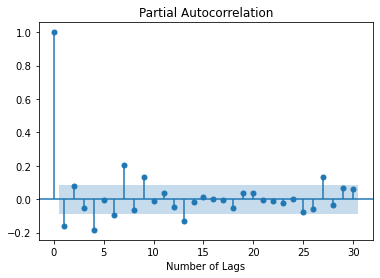

In [3]:
sm.graphics.tsa.plot_pacf(diff_T,lags=30)
plt.xlabel('Number of Lags')
plt.show()

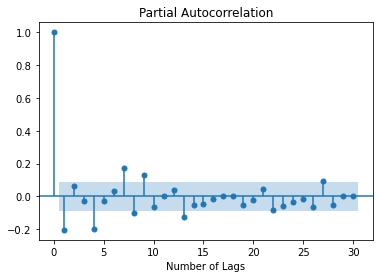

In [4]:
sm.graphics.tsa.plot_pacf(diff_VZ,lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [5]:
from statsmodels.tsa.ar_model import AutoReg

I pick 7th lag because picking longer horizon prevent us to have a good fit.

In [6]:
ar_T = AutoReg(diff_train_T, lags=7)
ar_fitted_T = ar_T.fit()

In [7]:
ar_predictions_T = ar_fitted_T.predict(start=len(diff_train_T), 
                                       end=len(diff_train_T)+len(diff_test_T)-1,dynamic=False)

In [8]:
ar_predictions_T = pd.DataFrame(ar_predictions_T)
ar_predictions_T.index = diff_test_T.index

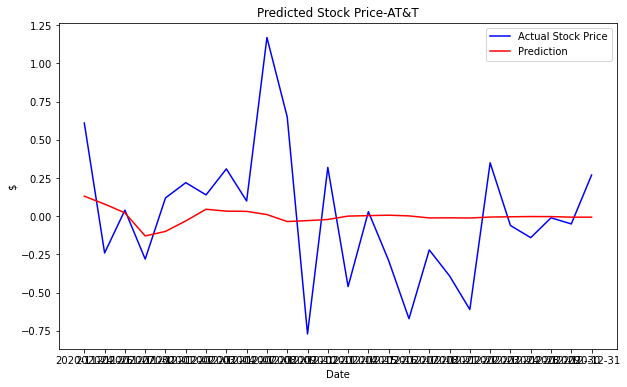

In [9]:
plt.figure(figsize=(10,6))
plt.plot(diff_test_T, label='Actual Stock Price', c='b')
plt.plot(ar_predictions_T, c='r', label='Prediction')
plt.title('Predicted Stock Price-AT&T')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

To measure the performance of the model, RMSE is used in the sense that it tends to exaggerate large errors, which can help when comparing methods. In addition, due to the non-linearity, it is convenient in optimization process.

In [11]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [12]:
print('RMSE of AT&T for AR model {:.4f}'\
      .format(rmse(diff_test_T,ar_predictions_T)))

RMSE of AT&T for AR model 0.4188


In [13]:
ar_VZ = AutoReg(diff_train_VZ,lags=9)
ar_fitted_VZ = ar_VZ.fit()

In [14]:
ar_predictions_VZ = ar_fitted_VZ.predict(start=len(diff_train_VZ), 
                                         end=len(diff_train_VZ)+len(diff_test_VZ)-1,
                                         dynamic=False)

In [15]:
ar_predictions_VZ=pd.DataFrame(ar_predictions_VZ)
ar_predictions_VZ.index=diff_test_VZ.index

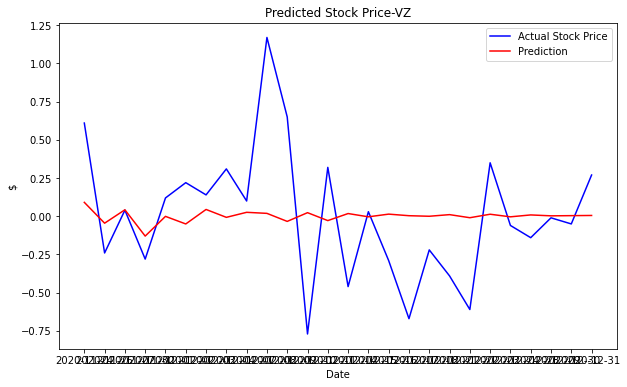

In [16]:
plt.figure(figsize=(10,6))
plt.plot(diff_test_T[-split:], label='Actual Stock Price', c='b')
plt.plot(ar_predictions_VZ, c='r', label='Prediction')
plt.title('Predicted Stock Price-VZ')
plt.xlabel('Date')
plt.ylabel('$')
plt.legend()
plt.show()

In [17]:
print('RMSE of AT&T for AR model {:.4f}'\
      .format(rmse(diff_test_VZ,ar_predictions_VZ)))

RMSE of AT&T for AR model 0.4492
